### Ising model 2D
Simulation setup

create plot object

Iterations

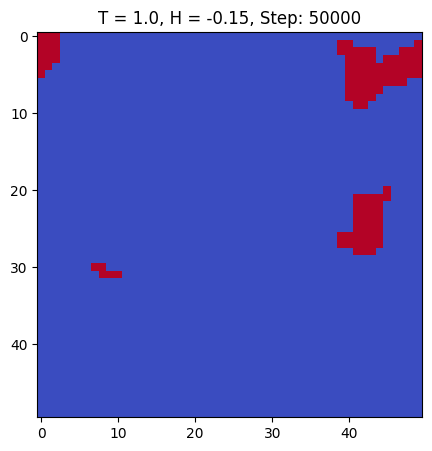

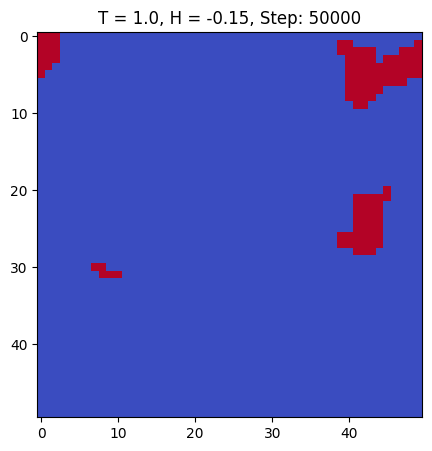

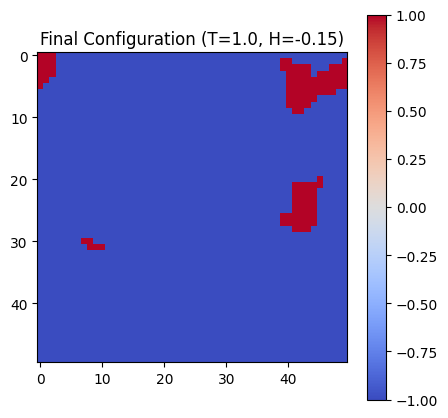

T = 1.0, H = -0.15 => Energy: -4974.10, Magnetization: -0.91


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Parameters
L = 50  # Lattice size
NStp = 50001  # Number of Monte Carlo steps
J = 1.0  # Interaction energy
k = 1.0  # Boltzmann constant

# Define temperature and field test cases
test_cases = [
    (1.0, 0),    # T = 1.0, H = 0
    (3.5, 0),    # T = 3.5, H = 0
    (1.0, 0.15), # T = 1.0, H = 0.15
    (1.0, -0.15) # T = 1.0, H = -0.15
]

# Function to calculate energy
def compute_energy(S, J, H):
    E = 0
    for i in range(L):
        for j in range(L):
            E -= J * S[i, j] * (
                S[(i + 1) % L, j] + S[(i - 1) % L, j] +
                S[i, (j + 1) % L] + S[i, (j - 1) % L]
            ) + H * S[i, j]
    return 0.5 * E  # Each bond counted twice

# Function to calculate magnetization
def compute_magnetization(S):
    return np.sum(S) / (L**2)

# Function to run the Ising model simulation
def ising_simulation(T, H):
    S = np.random.choice([-1, 1], size=(L, L))  # Initialize random spins

    # Visualization setup
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_aspect('equal', adjustable='box')

    for step in range(NStp):
        # Randomly select a site in the grid
        idx, jdx = np.random.randint(0, L, size=2)

        # Compute current energy at selected site
        E_current = -J * S[idx, jdx] * (
            S[(idx + 1) % L, jdx] + S[(idx - 1) % L, jdx] +
            S[idx, (jdx + 1) % L] + S[idx, (jdx - 1) % L]
        ) - H * S[idx, jdx]

        # Flip spin
        S_trial = -S[idx, jdx]

        # Compute energy after flipping
        E_trial = -J * S_trial * (
            S[(idx + 1) % L, jdx] + S[(idx - 1) % L, jdx] +
            S[idx, (jdx + 1) % L] + S[idx, (jdx - 1) % L]
        ) - H * S_trial

        dE = E_trial - E_current  # Compute energy difference

        # Metropolis acceptance criterion
        if dE <= 0 or np.random.rand() < np.exp(-dE / (k * T)):
            S[idx, jdx] = S_trial

        # Visualization every 10,000 steps
        if step % 10000 == 0:
            clear_output(wait=True)
            ax.clear()
            ax.set_title(f"T = {T}, H = {H}, Step: {step}")
            ax.imshow(S, cmap='coolwarm', origin='upper')
            display(plt.gcf())

    # Final results
    E_final = compute_energy(S, J, H)
    M_final = compute_magnetization(S)

    # Display final configuration
    plt.figure(figsize=(5, 5))
    plt.imshow(S, cmap='coolwarm', origin='upper')
    plt.title(f"Final Configuration (T={T}, H={H})")
    plt.colorbar()
    plt.show()

    return E_final, M_final

# Run the simulation for each test case
results = []
for T, H in test_cases:
    print(f"\nRunning simulation for T = {T}, H = {H}...")
    E_final, M_final = ising_simulation(T, H)
    results.append((T, H, E_final, M_final))
    print(f"T = {T}, H = {H} => Energy: {E_final:.2f}, Magnetization: {M_final:.2f}")
